<a href="https://colab.research.google.com/github/haleelsada/Hello-opensource/blob/master/Intuition_Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading Data**

Upload Data required to train the machine learning model from local drive

Import modules required

In [2]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import cv2

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout


np.random.seed(1)
print('imported modules')

imported modules


Testing an image

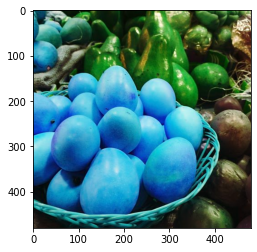

In [7]:
#testing with one image
image=cv2.imread('/content/drive/MyDrive/fruits/test/mango_656.jpg')
plt.imshow(image)

## **Preprocessing the images(to train) to input it in model**
*  The images are in different sizes, it would be more edible for the model if the picture files are in same size.
*  Create two lists trainimage and trainlabels for taking image name(one-hot-encoded) and image respectively
* In trainimage read with cv2 and resize to 200x200 format

In [28]:
trainimages = []       
trainlabels = [] 
train_path = '/content/drive/MyDrive/fruits/train'
for filename in os.listdir('/content/drive/MyDrive/fruits/train'):
    
    img = cv2.imread(os.path.join(train_path,filename))
        
    # Spliting file names and storing the labels for image in list
    trainlabels.append(filename.split('_')[0])
        
    # Resize all images to shape 200x200
    img = cv2.resize(img,(200,200))
        
    trainimages.append(img)

# Converting labels to One Hot encoded matrix
trainlabels = pd.get_dummies(trainlabels).values

# Converting trainimages to array
trainimages = np.array(trainimages)

Preprocessing the images(to validation) to input it in model

In [29]:
testimages = []
testlabels = []
test_path = '/content/drive/MyDrive/fruits/test'

for filename in os.listdir('/content/drive/MyDrive/fruits/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        testlabels.append(filename.split('_')[0])
        
        img = cv2.resize(img,(200,200))
        
        testimages.append(img)

testlabels = pd.get_dummies(testlabels).values
        
test_images = np.array(testimages)

[1 0]


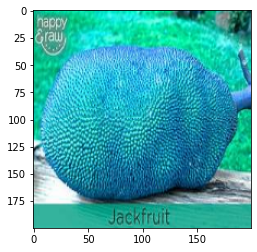

In [30]:
#try one image to see if its working
print(testlabels[0])
plt.imshow(testimages[0])

**Model**

Create a simple sequential model with multiple layers

In [31]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(2,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [32]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
flatten_2 (Flatten)          (None, 276480)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                5529620   
_________________________________________________________________
dense_7 (Dense)              (None, 15)               

Train the model with trainimages and trainlabels as label  with testimages and testlabels as validation set

In [33]:
history = model.fit(np.array(trainimages),np.array(trainlabels),epochs=50,batch_size=100,
                    validation_data=(np.array(testimages),np.array(testlabels)))

Epoch 1/50
13/13 [==============================] - 166s 13s/step - loss: 14.1238 - acc: 0.4885 - val_loss: 0.5790 - val_acc: 0.5000
Epoch 2/50
13/13 [==============================] - 164s 13s/step - loss: 0.5001 - acc: 0.7332 - val_loss: 0.3721 - val_acc: 0.8656
Epoch 3/50
13/13 [==============================] - 164s 13s/step - loss: 0.4341 - acc: 0.8231 - val_loss: 0.2363 - val_acc: 0.9250
Epoch 4/50
13/13 [==============================] - 164s 13s/step - loss: 0.3509 - acc: 0.8580 - val_loss: 0.2105 - val_acc: 0.9156
Epoch 5/50
13/13 [==============================] - 164s 13s/step - loss: 0.2086 - acc: 0.9160 - val_loss: 0.2997 - val_acc: 0.8687
Epoch 6/50
13/13 [==============================] - 166s 13s/step - loss: 0.1987 - acc: 0.9250 - val_loss: 0.1888 - val_acc: 0.9281
Epoch 7/50
13/13 [==============================] - 168s 13s/step - loss: 0.2038 - acc: 0.9162 - val_loss: 0.2093 - val_acc: 0.9156
Epoch 8/50
13/13 [==============================] - 168s 13s/step - loss: 0

Save the model back to drive for further use

In [42]:
model.save('/content/drive/MyDrive/fruits/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/fruits/model/assets
